In [8]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

#### ***1.1 Data Preparation***



In [9]:
df_rating=pd.read_csv('/Users/riccardo.soleo/Desktop/ADM-HW4/archive/rating.csv')
df_rating=pd.DataFrame(df_rating)
df_movies = pd.read_csv('/Users/riccardo.soleo/Desktop/ADM-HW4/archive/movie.csv')
df_movies=pd.DataFrame(df_movies)

In [10]:
print(df_rating.head())
print(df_movies.head())

   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


as we can there is no need to convert the timestamps to datetime because its already in datetime


In [11]:
print(df_rating.isnull().values.any())

False


In [12]:
print(df_rating.describe())
print(df_rating['movieId'].nunique())


             userId       movieId        rating
count  2.000026e+07  2.000026e+07  2.000026e+07
mean   6.904587e+04  9.041567e+03  3.525529e+00
std    4.003863e+04  1.978948e+04  1.051989e+00
min    1.000000e+00  1.000000e+00  5.000000e-01
25%    3.439500e+04  9.020000e+02  3.000000e+00
50%    6.914100e+04  2.167000e+03  3.500000e+00
75%    1.036370e+05  4.770000e+03  4.000000e+00
max    1.384930e+05  1.312620e+05  5.000000e+00
26744


the dataset rating.csv contains ratings of movies by users with the column:

-userID: every user has his personal ID, we can see there are 138483 different users

-movieID: every movie has his own ID, there are 26744 different movies rated

-rating: the user's evaluation about the movie rated, the can give a rate from 1 to 5

-timestamp: the data and time when the user left the review

In [13]:
print(df_movies.describe(include='object'))

                 title genres
count            27278  27278
unique           27262   1342
top     Aladdin (1992)  Drama
freq                 2   4520


the other principal dataset is movie.csv, and its the dataset that contains all the movie rated , their corresponding ID and their genre, with a total of 1342 genres.

In [14]:
#merge the 2 dataset in order to add thw title and the genre to rating.csv
merged_df = df_rating.merge(df_movies, on="movieId", how="left")
most_reviewed_movies=merged_df['title'].value_counts().head(10)
print(most_reviewed_movies)


title
Pulp Fiction (1994)                          67310
Forrest Gump (1994)                          66172
Shawshank Redemption, The (1994)             63366
Silence of the Lambs, The (1991)             63299
Jurassic Park (1993)                         59715
Star Wars: Episode IV - A New Hope (1977)    54502
Braveheart (1995)                            53769
Terminator 2: Judgment Day (1991)            52244
Matrix, The (1999)                           51334
Schindler's List (1993)                      50054
Name: count, dtype: int64


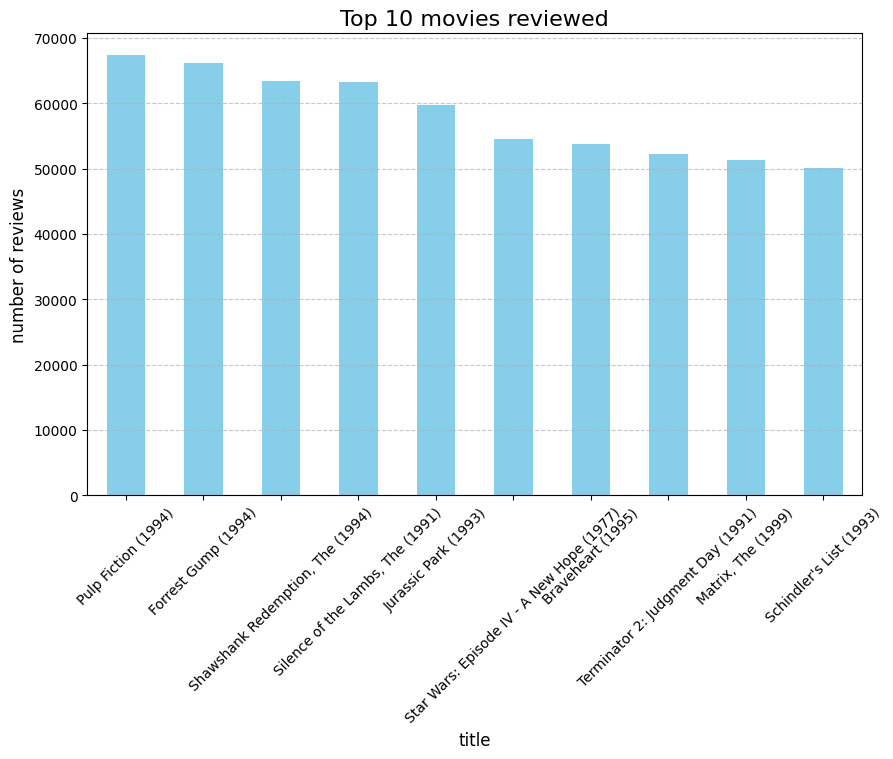

In [15]:
plt.figure(figsize=(10, 6))
most_reviewed_movies.plot(kind='bar', color='skyblue')
plt.title("Top 10 movies reviewed", fontsize=16)
plt.xlabel("title", fontsize=12)
plt.ylabel("number of reviews", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

as we can see the most reviewed movies are pulp fiction, forrest gump etc.
all movies from the 90s!

In [16]:
most_active_users=merged_df['userId'].value_counts().head(10)
print(most_active_users)

userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
74142     5447
34576     5356
131904    5330
83090     5169
59477     4988
Name: count, dtype: int64


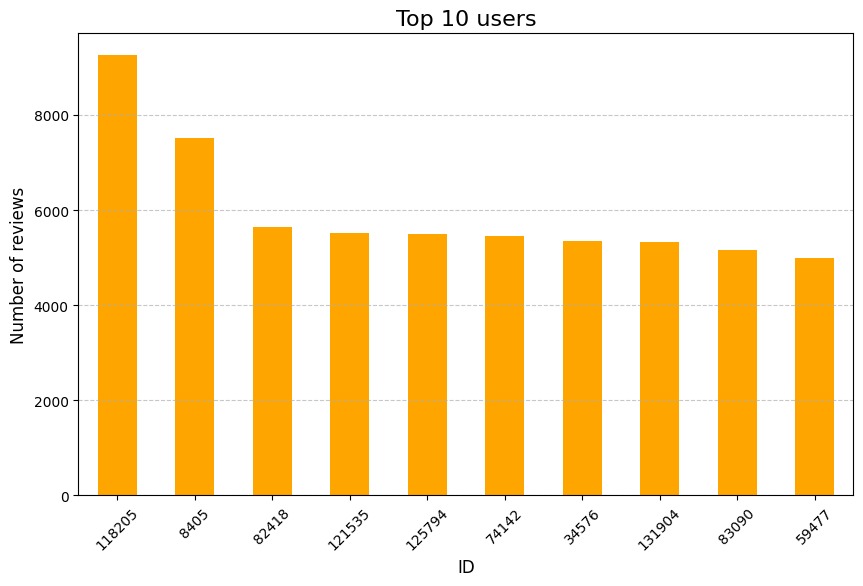

In [17]:
plt.figure(figsize=(10, 6))
most_active_users.plot(kind='bar', color='orange')
plt.title("Top 10 users", fontsize=16)
plt.xlabel("ID", fontsize=12)
plt.ylabel("Number of reviews", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

wow there are users with more than 6000 movies reviewed.
we could remove them.

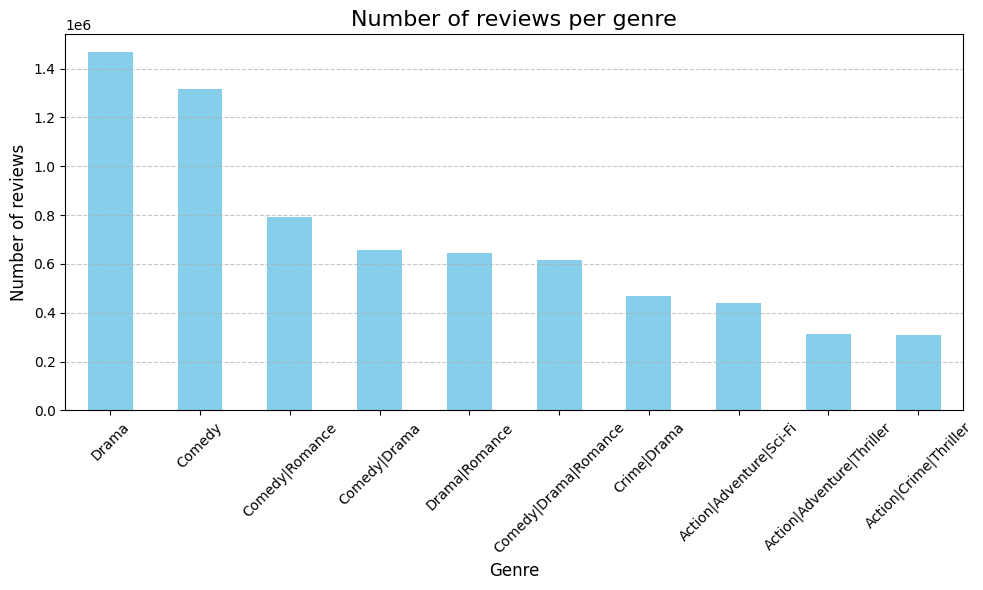

In [18]:
genre_counts_top10 = merged_df['genres'].value_counts().head(10)
plt.figure(figsize=(10, 6))
genre_counts_top10.plot(kind='bar', color='skyblue')
plt.title("Number of reviews per genre", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of reviews", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

the top genres reviewed are drama and comedy and their subgenres, followed by action,crime and thriller movies.

In [19]:
average_ratings = df_rating.groupby('movieId')['rating'].mean().reset_index()
average_ratings.rename(columns={'rating': 'average_rating'}, inplace=True)

#add a new column with the average rating for each movie
merged_df = merged_df.merge(average_ratings, on="movieId", how="left")
print(merged_df.head())

   userId  movieId  rating            timestamp  \
0       1        2     3.5  2005-04-02 23:53:47   
1       1       29     3.5  2005-04-02 23:31:16   
2       1       32     3.5  2005-04-02 23:33:39   
3       1       47     3.5  2005-04-02 23:32:07   
4       1       50     3.5  2005-04-02 23:29:40   

                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cité des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                   genres  average_rating  
0              Adventure|Children|Fantasy        3.211977  
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi        3.952230  
2                 Mystery|Sci-Fi|Thriller        3.898055  
3                        Mystery|Thriller        4.053493  
4                  Crime|Mystery|Thriller        4.33437

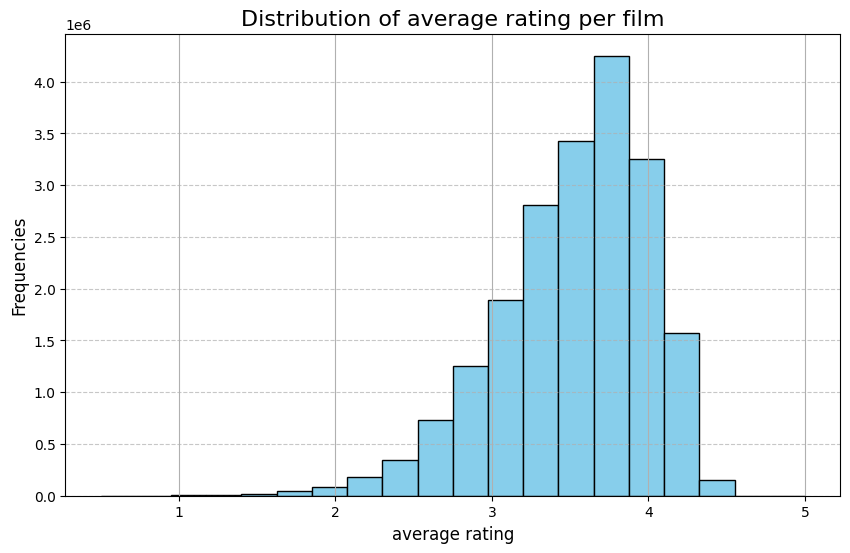

In [20]:
top_rated_movies = merged_df[['movieId', 'title', 'genres', 'average_rating']].drop_duplicates().sort_values(by='average_rating', ascending=False)
plt.figure(figsize=(10, 6))
merged_df['average_rating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of average rating per film", fontsize=16)
plt.xlabel("average rating", fontsize=12)
plt.ylabel("Frequencies", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### ***1.2 Minhash Signatures***

We shall focus initially on a particular notion of “similarity”: the similarity of sets by looking at the relative size of their intersection. This notion of similarity is called Jaccard similarity:

$J(A, B) = \frac{|A \cap B|}{|A \cup B|}$

In [21]:
def jaccard(s1,s2):
    intersection = len(s1 & s2)  # common elements
    union = len(s1 | s2)        
    return intersection / union if union > 0 else 0.0

Calculating the Jaccard Similarity directly is computationally expensive for large datasets like our,
minhashing provides a way to approximate it by using a signature of each set.

Minhashing works as follows:

1- Each item in the set is hashed using multiple hash functions.

2- For each hash function, the minimum hash value across the items in the set is recorded.

3- These "minimum values" (one per hash function) form the minhash signature for the set.

The similarity between two sets can then be estimated by comparing their minhash signatures.

$\rightarrow$ The fraction of matching hash values across all hash functions gives an approximation of the Jaccard Similarity.

Minhash is a technique designed to efficiently compare users with similar movie-watching habits. Instead of directly computing the Jaccard similarity between the sets of movies watched by users—which can be computationally expensive for large datasets—we summarize each user’s watched movies into a compact representation known as a signature vector. These signature vectors allow us to approximate the Jaccard similarity between users by comparing their compressed information. The goal is to ensure that the probability of corresponding elements in two users' signature vectors being equal matches the Jaccard similarity of their original sets, thereby providing a meaningful representation.

In [22]:
#arrays to store movie ID user IDs
user_ids = np.array(merged_df.userId.drop_duplicates())
movie_ids = np.array(merged_df.movieId.drop_duplicates())



now we are going to construct the movies dictionary

In [23]:
#dictionary that maps movie_ids values to virtual row indeces
num_movies = len(movie_ids)
movie_ids_dictionary = dict({movie_ids[i]:i for i in range(num_movies)})

In [24]:
def movie_map(movie_id, movie_ids_dictionary):
    try:
        return movie_ids_dictionary[movie_id]
    except:
        print('Movie is not in dictionary')


In [25]:
merged_df['movie_row'] = merged_df['movieId'].apply(lambda x: movie_map(x, movie_ids_dictionary))

# Group by 'userId' and aggregate watched movie IDs into numpy arrays for each user
user_movies_dict = merged_df.groupby('userId')['movie_row'].apply(np.array).to_dict()

it is important to confirm whether the linear_hash and bitwise_hash functions distribute the integer row indices uniformly across the available range. Ensuring uniform distribution minimizes collisions and maintains the accuracy of the MinHash process, then we can use one of the 2 minhash (linear or bitwise)

In [26]:
from minhash_utils1 import linear_mod_hash,bitwise_shift_hash

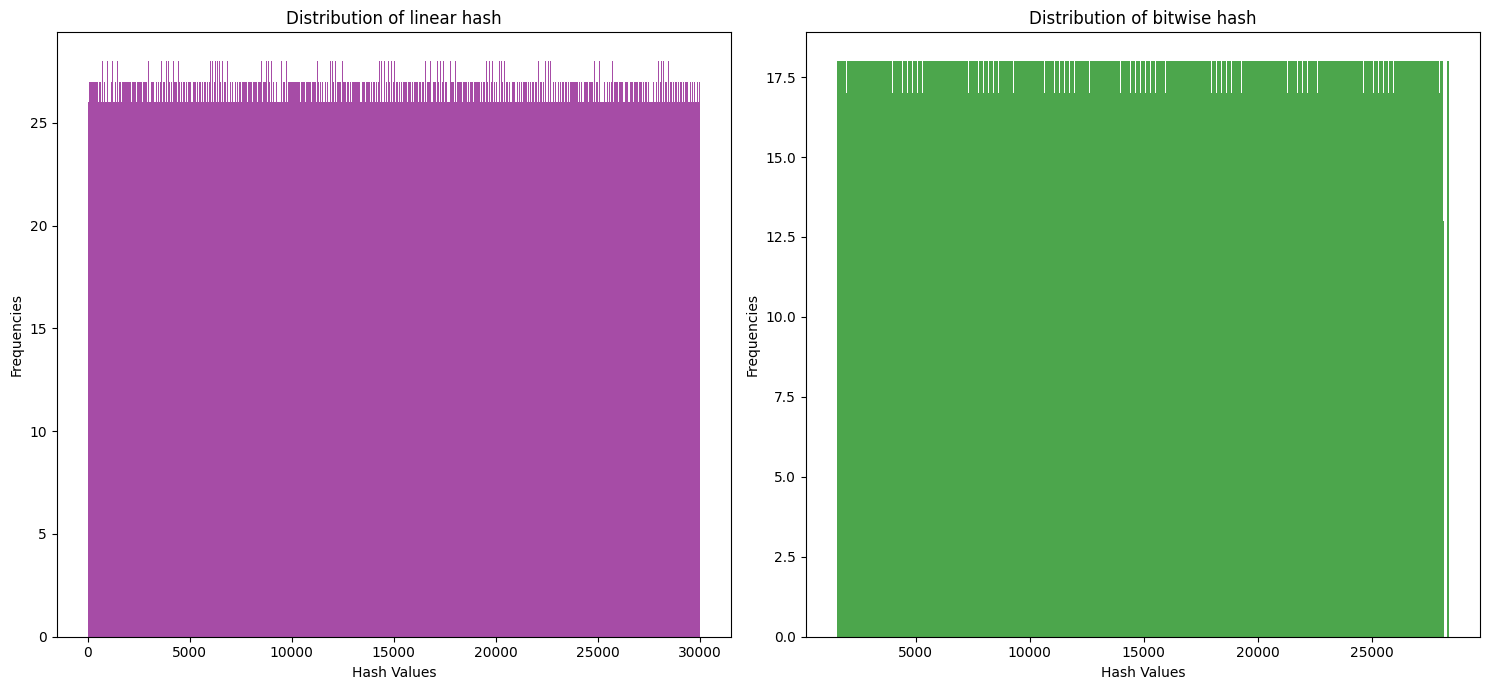

In [27]:

row_indeces = np.array(range(num_movies))

linear_results = linear_mod_hash(row_indeces) 
bitwise_results = bitwise_shift_hash(row_indeces) 

fig, axes = plt.subplots(1,2,figsize=(15,7))

# Distribution of linear hash 
axes[0].hist(linear_results, bins=1000, color='purple', alpha=0.7)
axes[0].set_xlabel('Hash Values')
axes[0].set_ylabel('Frequencies')
axes[0].set_title("Distribution of linear hash")

# Distribution of bitwise hash 
axes[1].hist(bitwise_results, bins=1500, color='green', alpha=0.7)
axes[1].set_xlabel('Hash Values')
axes[1].set_ylabel('Frequencies')
axes[1].set_title("Distribution of bitwise hash")

plt.tight_layout()
plt.show()

we can see that its a good result for both the minhash functions, they are more or less uniformly distribuited

The random_signature function is used to create a signatures matrix, which is a compact representation of users watched movie sets. 
It generates k random hash functions, alternating between linear and bitwise, for each user the function takes the list of indices corresponding to the movies they watched (row indices), then for every hash function, the minimum hash value among all the movies watched by the user is computed and the minimum hash values for all k hash functions form a signature vector for each user.

 $\rightarrow$ the result is a signature matrix
 
This process significantly reduces the computational cost of comparing large sets by summarizing them into fixed-size signature vectors.

In [28]:
from minhash_utils1 import  random_minhash

In [29]:
k = 50
signature_matrix, hash_functions = random_minhash(user_ids, user_movies_dict, k)
#display first 10 rows of the signature matrix
random_minhash_outputs = pd.DataFrame(signature_matrix, columns = user_ids)
print('First 10 rows of the signature matrix')
display(random_minhash_outputs.iloc[:10]) 

First 10 rows of the signature matrix


1        2        3        4        5        6        7        8       \
0    506.0    338.0      2.0    254.0    853.0   1010.0    181.0     97.0   
1  24759.0  24765.0  24777.0  24790.0  24778.0  24765.0  24375.0  24279.0   
2  16163.0  16174.0  16167.0  16238.0  16227.0  16236.0  15651.0  15683.0   
3    142.0     57.0     57.0    706.0    706.0   2203.0     28.0    706.0   
4     45.0     38.0     31.0    292.0     24.0   1907.0     17.0     10.0   
5  19988.0  19993.0  19988.0  20024.0  20008.0  20035.0  19999.0  20025.0   
6     13.0    816.0    661.0    630.0    599.0    599.0    382.0     13.0   
7  22067.0  22068.0  22069.0  22103.0  22091.0  22102.0  22074.0  22100.0   
8     65.0    152.0    239.0     39.0    526.0     39.0    126.0     39.0   
9     52.0   1269.0    125.0    981.0    336.0    121.0     48.0    551.0   

    9        10      ...   138484   138485   138486   138487   138488  \
0     13.0    842.0  ...    254.0    853.0    276.0    601.0     97.0   
1  24248.0  24247.0  ...  22237.0  22639.0    158.0  14374.0  24264.0   
2  15660.0  15719.0  ...  10842.0  13933.0   1981.0   3617.0  15686.0   
3   2230.0    169.0  ...     26.0   2033.0    283.0    132.0   1807.0   
4    539.0   1893.0  ...     10.0    553.0     24.0    730.0     24.0   
5  19988.0  19989.0  ...  16934.0  17941.0  11046.0  10740.0  19020.0   
6   1340.0    320.0  ...     13.0     41.0     69.0    649.0    630.0   
7  22079.0  22069.0  ...  18084.0  22072.0  12062.0  10434.0  22109.0   
8    700.0   1187.0  ...     39.0     13.0    152.0     14.0    526.0   
9    620.0    409.0  ...    125.0    190.0    328.0    125.0   1265.0   

    138489   138490   138491   138492   138493  
0    740.0    170.0    455.0    298.0     13.0  
1  22260.0  14261.0  22734.0  22206.0     17.0  
2  13810.0   5423.0  14182.0   9789.0   5755.0  
3    142.0    364.0   2792.0    198.0     82.0  
4    497.0     10.0   1802.0     10.0     24.0  
5  17966.0   8876.0  17989.0  17247.0   8938.0  
6   1557.0     13.0    255.0    627.0      7.0  
7  22105.0  14104.0  22161.0  18804.0  13878.0  
8    152.0    152.0    839.0    152.0     48.0  
9    247.0    535.0    336.0   1188.0     40.0  

[10 rows x 138493 columns]

now we are going to sample n users random, split them into 2 groups and see if the minhash probability of the 2 groups its equal to the jaccard similarity of the 2 sets.

In [30]:
from minhash_utils1 import calculate_jaccard

P(s1[i]==s2[i]) = 0.1, Jaccard(user1, user2) = 0.20394736842105263
P(s1[i]==s2[i]) = 0.04, Jaccard(user1, user2) = 0.045283018867924525
P(s1[i]==s2[i]) = 0.06, Jaccard(user1, user2) = 0.025
P(s1[i]==s2[i]) = 0.0, Jaccard(user1, user2) = 0.02914798206278027
P(s1[i]==s2[i]) = 0.02, Jaccard(user1, user2) = 0.031746031746031744
P(s1[i]==s2[i]) = 0.02, Jaccard(user1, user2) = 0.017241379310344827
P(s1[i]==s2[i]) = 0.0, Jaccard(user1, user2) = 0.0
P(s1[i]==s2[i]) = 0.06, Jaccard(user1, user2) = 0.031007751937984496
P(s1[i]==s2[i]) = 0.06, Jaccard(user1, user2) = 0.09803921568627451
P(s1[i]==s2[i]) = 0.02, Jaccard(user1, user2) = 0.018867924528301886
P(s1[i]==s2[i]) = 0.08, Jaccard(user1, user2) = 0.09349593495934959
P(s1[i]==s2[i]) = 0.18, Jaccard(user1, user2) = 0.1744186046511628
P(s1[i]==s2[i]) = 0.02, Jaccard(user1, user2) = 0.04979253112033195
P(s1[i]==s2[i]) = 0.0, Jaccard(user1, user2) = 0.03424657534246575
P(s1[i]==s2[i]) = 0.04, Jaccard(user1, user2) = 0.07849829351535836
P(s1[i]==s

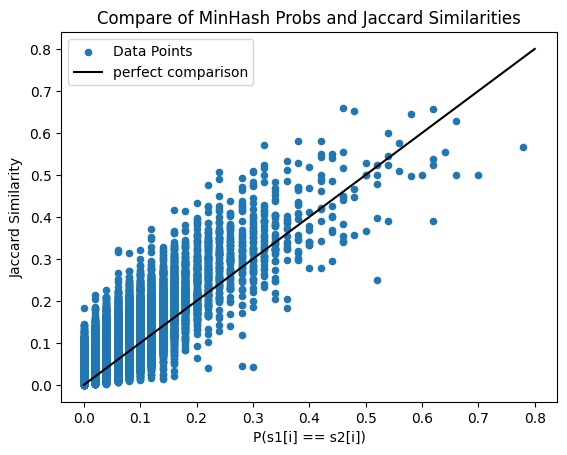

In [26]:
n = len(user_ids) # number of users to compare
# List of all user
user_columns = list(range(signature_matrix.shape[1]))
# Sampled user columns
sampled_user_columns = random.sample(user_columns, n)
# split in two groups
group1 = sampled_user_columns[:(n//2)]
group2 = sampled_user_columns[(n//2):]

errors = [] #the differences between P and Jaccard
prob_values = [] 
jaccard_values = [] 

for i in range(n//2):

    # Signature vectors 
    signature1 = signature_matrix[:,group1[i]]
    signature2 = signature_matrix[:,group2[i]]
    #compare the vectors
    prob_same_el = sum(signature1==signature2)/k
    prob_values.append(prob_same_el) # add probability to prob_values list

    # User ID of the current user
    user1 = user_ids[group1[i]]
    user2 = user_ids[group2[i]]
    # Sets of watched movies of the users
    watched_movies1 = set(user_movies_dict[user1])
    watched_movies2 = set(user_movies_dict[user2])
    # Jaccard similarity
    jaccard_sim = jaccard(watched_movies1, watched_movies2)
    jaccard_values.append(jaccard_sim) # add jaccard similarity to the list

    # Calculate error
    errors.append(abs(prob_same_el - jaccard_sim))

    #results
    print(f"P(s1[i]==s2[i]) = {prob_same_el}, Jaccard(user1, user2) = {jaccard_sim}")

# Print the average absolute error
print(f"Mean Absolute Error: {np.mean(errors)}")

#display scatter plot
plt.scatter(prob_values, jaccard_values, s=20, label='Data Points')
plt.plot([0, 0.8], [0, 0.8], color='black', linestyle='-', label='perfect comparison')
plt.xlabel("P(s1[i] == s2[i])")
plt.ylabel("Jaccard Similarity")
plt.legend()
plt.title("Compare of MinHash Probs and Jaccard Similarities")
plt.show()

its a very good result the data points are concentreated around the ideal fit y=x, and the mse is 0.022.

now we are going to experiment with 3 different settings: the linear minhash, the bitwise minhash and both(random minhash).
we will try with different seeds and different k values(number of hash funtions).

In [7]:
from tqdm import tqdm
import random
import numpy as np
import pandas as pd
from minhash_utils1 import minhash_results,random_minhash_results

In [27]:

p = 27281  # Prime number for hashing
k_values = [25, 75, 125, 175, 225]  # Modified k values
seeds = [7, 101, 2023, 31415, 98765]  # Modified seed values
a_b_range = list(range(1, p))

results = []

min_error_linear = 1
best_params_linear = None

min_error_bitwise = 1
best_params_bitwise = None

min_error_combined = 1
best_config_combined = None

# Iterate over k_values
for current_k in tqdm(k_values, desc="Evaluating different k values"):
    random.seed(31415)  # Fixed seed for reproducibility in parameter selection

    # Evaluate linear_hash and bitwise_hash
    for _ in range(3):  # Reduced iterations for simplicity
        params = random.sample(a_b_range, 2 * current_k)
        a_values, b_values = params[:current_k], params[current_k:]
        param_dict = {i: (a_values[i], b_values[i]) for i in range(current_k)}

        # Linear Hash Case
        k_hash_linear = np.zeros(current_k)
        error_linear = minhash_results(user_ids, user_movies_dict, k_hash_linear, linear_parameters=param_dict, num_hashes=current_k)
        avg_error_linear = np.mean(error_linear)
        results.append((current_k, 'linear_hash', 31415, avg_error_linear))
        if avg_error_linear < min_error_linear:
            min_error_linear = avg_error_linear
            best_params_linear = {'a': a_values, 'b': b_values}

        # Bitwise Hash Case
        k_hash_bitwise = np.ones(current_k)
        error_bitwise = minhash_results(user_ids, user_movies_dict, k_hash_bitwise, bitwise_parameters=param_dict, num_hashes=current_k)
        avg_error_bitwise = np.mean(error_bitwise)
        results.append((current_k, 'bitwise_hash', 31415, avg_error_bitwise))
        if avg_error_bitwise < min_error_bitwise:
            min_error_bitwise = avg_error_bitwise
            best_params_bitwise = {'a': a_values, 'b': b_values}

    # Evaluate combined hash functions with random seeds
    for seed in tqdm(seeds, desc=f"Evaluating combined hash for k={current_k}"):
        error_combined, hash_functions = random_minhash_results(user_ids, user_movies_dict, k=current_k, seed=seed)
        avg_error_combined = np.mean(error_combined)
        results.append((current_k, 'both', seed, avg_error_combined))
        if avg_error_combined < min_error_combined:
            min_error_combined = avg_error_combined
            best_config_combined = hash_functions

# Create DataFrame for results
results_df = pd.DataFrame(results, columns=['k', 'hashFunction', 'seed', 'avg_error'])

# Print results
print(f'Best Performance with only linear_hash: {min_error_linear}')
print(f'Best Performance with only bitwise_hash: {min_error_bitwise}')
print(f'Best Performance with both hash functions: {min_error_combined}')
print('\nAll results:')
display(results_df)


Evaluating different k values: 100%|██████████| 5/5 [29:52<00:00, 358.42s/it]

Best Performance with only linear_hash: 0.03210382184202253
Best Performance with only bitwise_hash: 0.036675926266376786
Best Performance with both hash functions: 0.015309590757972787

All results:


k  hashFunction   seed  avg_error
0    25   linear_hash  31415   0.032104
1    25  bitwise_hash  31415   0.036676
2    25   linear_hash  31415   0.035158
3    25  bitwise_hash  31415   0.040467
4    25   linear_hash  31415   0.034138
5    25  bitwise_hash  31415   0.044713
6    25          both      7   0.027684
7    25          both    101   0.026148
8    25          both   2023   0.026977
9    25          both  31415   0.027910
10   25          both  98765   0.028653
11   75   linear_hash  31415   0.037343
12   75  bitwise_hash  31415   0.041302
13   75   linear_hash  31415   0.039825
14   75  bitwise_hash  31415   0.040358
15   75   linear_hash  31415   0.039259
16   75  bitwise_hash  31415   0.043001
17   75          both      7   0.019739
18   75          both    101   0.018152
19   75          both   2023   0.018907
20   75          both  31415   0.020629
21   75          both  98765   0.023519
22  125   linear_hash  31415   0.037981
23  125  bitwise_hash  31415   0.040659
24  125   linear_hash  31415   0.040145
25  125  bitwise_hash  31415   0.046178
26  125   linear_hash  31415   0.039531
27  125  bitwise_hash  31415   0.043172
28  125          both      7   0.017453
29  125          both    101   0.015432
30  125          both   2023   0.015310
31  125          both  31415   0.018159
32  125          both  98765   0.020095
33  175   linear_hash  31415   0.039028
34  175  bitwise_hash  31415   0.041490
35  175   linear_hash  31415   0.043312
36  175  bitwise_hash  31415   0.048735
37  175   linear_hash  31415   0.043416
38  175  bitwise_hash  31415   0.043764
39  175          both      7   0.018483
40  175          both    101   0.017305
41  175          both   2023   0.018546
42  175          both  31415   0.016155
43  175          both  98765   0.019679
44  225   linear_hash  31415   0.042753
45  225  bitwise_hash  31415   0.041338
46  225   linear_hash  31415   0.043325
47  225  bitwise_hash  31415   0.048016
48  225   linear_hash  31415   0.043058
49  225  bitwise_hash  31415   0.045683
50  225          both      7   0.020370
51  225          both    101   0.016259
52  225          both   2023   0.016967
53  225          both  31415   0.018468
54  225          both  98765   0.017545

The random minhash approach has better performance as it dynamically selects hash functions and parameters, with a more uniform distribution of hash values and reducing collisions. 

$\rightarrow$ more accurate representation of user similarities and improves the estimation of Jaccard similarity.

Optimal hash functions configuration:
(0) for linear_hash, (1) for bitwise_hash; second and third values are parameters a and b.
[(np.int64(0), np.int64(16706), np.int64(3414)), (np.int64(0), np.int64(29530), np.int64(27076)), (np.int64(0), np.int64(5722), np.int64(9292)), (np.int64(0), np.int64(11848), np.int64(16306)), (np.int64(0), np.int64(13766), np.int64(805)), (np.int64(0), np.int64(12834), np.int64(14683)), (np.int64(1), np.int64(14939), np.int64(4130)), (np.int64(0), np.int64(6835), np.int64(21741)), (np.int64(0), np.int64(21177), np.int64(15163)), (np.int64(1), np.int64(8293), np.int64(10138)), (np.int64(0), np.int64(16319), np.int64(6545)), (np.int64(1), np.int64(27830), np.int64(2596)), (np.int64(0), np.int64(7153), np.int64(1521)), (np.int64(1), np.int64(27543), np.int64(15558)), (np.int64(0), np.int64(10857), np.int64(16546)), (np.int64(1), np.int64(4733), np.int64(6592)), (np.int64(0), np.int64(13849), np.int64(5149)), (np.int64(1), np.int64(3274), np.int64(26836)), (np.

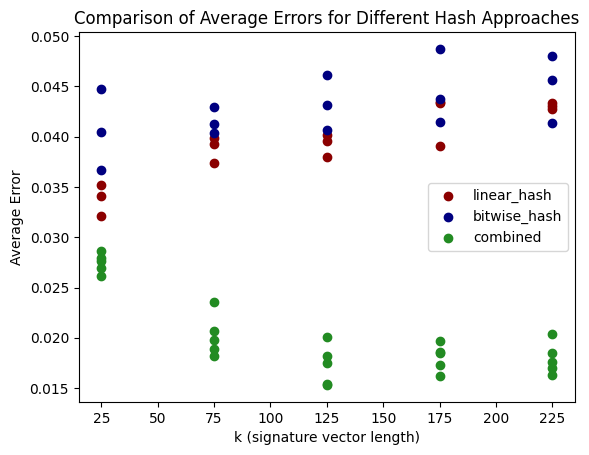

In [28]:
# Save results to CSV
csv_results = results_df.to_csv(index=False)

# Print best configuration parameters
print('Optimal hash functions configuration:')
print('(0) for linear_hash, (1) for bitwise_hash; second and third values are parameters a and b.')
print(best_config_combined)

# Separate results by hash function type
linear_df = results_df[results_df['hashFunction'] == 'linear_hash']
bitwise_df = results_df[results_df['hashFunction'] == 'bitwise_hash']
combined_df = results_df[results_df['hashFunction'] == 'both']

# Create scatter plots to visualize performance
plt.scatter(linear_df['k'], linear_df['avg_error'], color='darkred', label='linear_hash')
plt.scatter(bitwise_df['k'], bitwise_df['avg_error'], color='navy', label='bitwise_hash')
plt.scatter(combined_df['k'], combined_df['avg_error'], color='forestgreen', label='combined')

plt.xlabel('k (signature vector length)')
plt.ylabel('Average Error')
plt.title('Comparison of Average Errors for Different Hash Approaches')
plt.legend()
plt.show()


the random minhash has a significatevly lower average error, confirming that use it is the better solution.

### ***LSH***


Locality-Sensitive Hashing (LSH) is a technique to quickly and efficiently identify similar users in a large datasets. Instead of comparing every pair of users, LSH partitions users into "buckets" based on hash values. Items that are likely to be similar have a high probability of being in the same bucket. This drastically reduces the number of comparisons and speeds up similarity searches. Combined with MinHash signatures (compact representations of sets), LSH helps us rapidly identify candidate pairs that are likely to share a high Jaccard similarity.

In [5]:
from minhash_utils1 import linear_dot_prod_hash, LSH,LSH_performance

In [31]:
r=5
p=30011
seed=42

# Hash bands to buckets
buckets, candidates = LSH(signature_matrix, user_ids, r, p, seed)

# Create dataframe to store the buckets and number of users hashed to each bucket
buckets_df = pd.DataFrame(buckets.items(), columns = ['Bucket', 'Users'])
buckets_df['NumUsers'] = buckets_df['Users'].apply(len)

# Create dataframe to store the users and candidates 
candidates_df = pd.DataFrame(candidates.items(), columns = ['User', 'Candidates'])
candidates_df['NumCandidates'] = candidates_df['Candidates'].apply(len)

# Print number of buckets
print('Number of buckets: ', len(buckets))

# Print users and his bucket
print('Users hashed to each bucket:')
display(buckets_df)

# Print candidates of each user
print('Candidates of each user:')
display(candidates_df)

Number of buckets:  30011
Users hashed to each bucket:


Bucket                                              Users  NumUsers
0       21104  [1, 69916, 116065, 136890, 989, 10334, 63145, ...        57
1        6451  [2, 67591, 70435, 80832, 127871, 9754, 91398, ...        54
2       26877  [3, 29764, 32696, 56635, 68565, 111011, 36565,...        55
3       23087  [4, 40269, 58669, 78762, 103870, 131425, 87655...        44
4       21209  [5, 2744, 24682, 40878, 44144, 75570, 109538, ...        41
...       ...                                                ...       ...
30006    7395  [25050, 30289, 228, 6848, 17238, 31987, 49940,...        31
30007    6898  [37138, 48959, 89564, 96942, 127766, 53123, 54...        39
30008   10956  [42081, 47073, 78817, 109542, 96277, 21272, 65...        30
30009   20678  [45891, 57819, 14118, 17035, 87975, 91274, 103...        46
30010   28745  [49923, 102071, 31837, 90990, 135132, 27118, 4...        29

[30011 rows x 3 columns]

Candidates of each user:


User                                         Candidates  \
0          198  {110592, 51201, 46593, 50693, 50186, 70670, 12...   
1          240  {62466, 134148, 114181, 19465, 91658, 20489, 1...   
2          329  {102401, 85507, 37892, 117769, 48137, 117257, ...   
3          368  {44034, 45063, 45577, 37898, 130059, 13, 69136...   
4          444  {37891, 85005, 98836, 23573, 95767, 75799, 266...   
...        ...                                                ...   
138488   73521  {83968, 118785, 27651, 110597, 5126, 11785, 92...   
138489   78666  {57862, 112650, 89610, 97811, 77845, 133144, 1...   
138490   90500  {66561, 114689, 69123, 50178, 56837, 123398, 5...   
138491   92096  {1538, 88578, 90628, 23557, 101894, 85000, 138...   
138492  110669  {66562, 13827, 83459, 3076, 69639, 12807, 2663...   

        NumCandidates  
0                 228  
1                 205  
2                 193  
3                 163  
4                 202  
...               ...  
138488            200  
138489            204  
138490            248  
138491            244  
138492            233  

[138493 rows x 3 columns]

now lets print the histrograms

Average candidate set size: 245.7971377614753


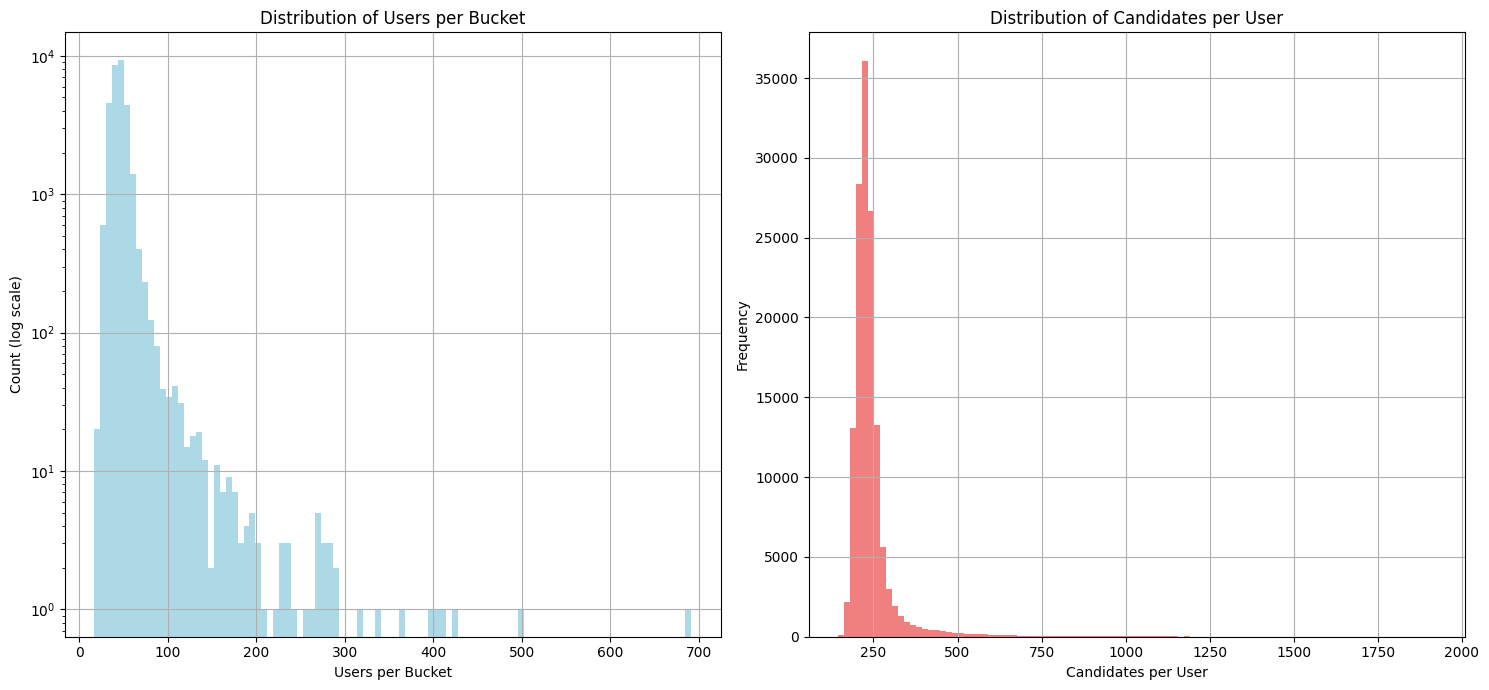

In [27]:
# Display the average number of candidates per user
mean_candidates = candidates_df['NumCandidates'].mean()
print('Average candidate set size:', mean_candidates)

# Set up figure for two histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Histogram for the distribution of users per bucket
buckets_df['NumUsers'].hist(ax=axes[0], bins=100, color='lightblue', log=True)
axes[0].set_xlabel('Users per Bucket')
axes[0].set_ylabel('Count (log scale)')
axes[0].set_title('Distribution of Users per Bucket')

# Histogram for the distribution of candidates per user
candidates_df['NumCandidates'].hist(ax=axes[1], bins=100, color='lightcoral')
axes[1].set_xlabel('Candidates per User')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Candidates per User')

plt.tight_layout()
plt.show()


Distribution of Users per Bucket (left plot):

-The logarithmic scale on the y-axis indicates that most buckets contain relatively few users, while only a small number of buckets include a larger amount.

-The decreasing trend suggests that the hashing approach spread users into many small buckets, with only a few buckets hosting more numerous user groups.

-Practically speaking, this means that LSH prevented an excessive concentration of users in just a handful of buckets, achieving a relatively balanced distribution despite some variance.

Distribution of Candidates per User (right plot):

-The histogram shows that most users have a number of candidates clustered around a certain range (for instance, a few hundred), and the candidate count drops off sharply for higher values.

-This suggests that while LSH drastically reduces the need to compare every user with all others, it still provides a manageable set of candidates for most users.

-The tail to the right, though less prominent, indicates that some users still end up with a relatively large number of candidates, but these cases are much less common.

$\rightarrow$ the results indicate that LSH succeeded in distributing users in a way that avoids overly populated buckets, however, there remains some variability both in the number of users per bucket and in the number of candidates per user, suggesting there may still be room for further optimization.

### ***query***


now we are going to search the most similar users given a random user(2734)

In [26]:
from minhash_utils1 import similar_users

In [32]:
user_q = 2734 # 
two_most_similar_users = similar_users(user_q, candidates, user_ids, user_movies_dict) 
print('Three most similar users to user {}:'.format(user_q))
display(two_most_similar_users)

Three most similar users to user 2734:


User  Similarity
0  75512    0.295890
1  42630    0.242623
2  14427    0.234875

In [33]:
from  minhash_utils1 import recommend_movies

In [34]:
# Query user
query_user1 = 2734
# Print recommended movies for user
print(f'Movies Recommended to User {query_user1}:')
movie_recs = recommend_movies(query_user1, candidates, user_ids, user_movies_dict, df_rating, df_movies)
display(movie_recs)

Movies Recommended to User 2734:


movie  rating
40                        Fargo (1996)     5.0
17                 My Left Foot (1989)     4.5
44  Four Weddings and a Funeral (1994)     4.5
8                    Casablanca (1942)     4.5
33    Silence of the Lambs, The (1991)     4.5